TASK-1 :
Movie Recommendations : Build a movie recommendation system using collaborative filtering and machine learning techniques in Python.

Importing Libraries

In [7]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt 
import seaborn as sns           
%matplotlib inline



In [8]:
ratings_df = pd.read_csv('C:\\Users\\User\\Downloads\\ratings_small.csv~\\ratings_small.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
movies_df = pd.read_csv('C:\\Users\\User\\Downloads\\movies.csv~\\movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movie_data = pd.merge(ratings_df, movies_df, on='movieId')

movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Calculate mean rating of all movies

In [11]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

Calculate count rating of all movies

In [12]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [13]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=True).head()

title
Last Metro, The (Dernier métro, Le) (1980)    1
Lifeguard, The (2013)                         1
Light Sleeper (1992)                          1
Light Years (Gandahar) (1988)                 1
Lightning in a Bottle (2004)                  1
Name: rating, dtype: int64

creating dataframe with 'rating' count values 

In [14]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [15]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


plot graph of 'num of ratings column' 

<AxesSubplot:>

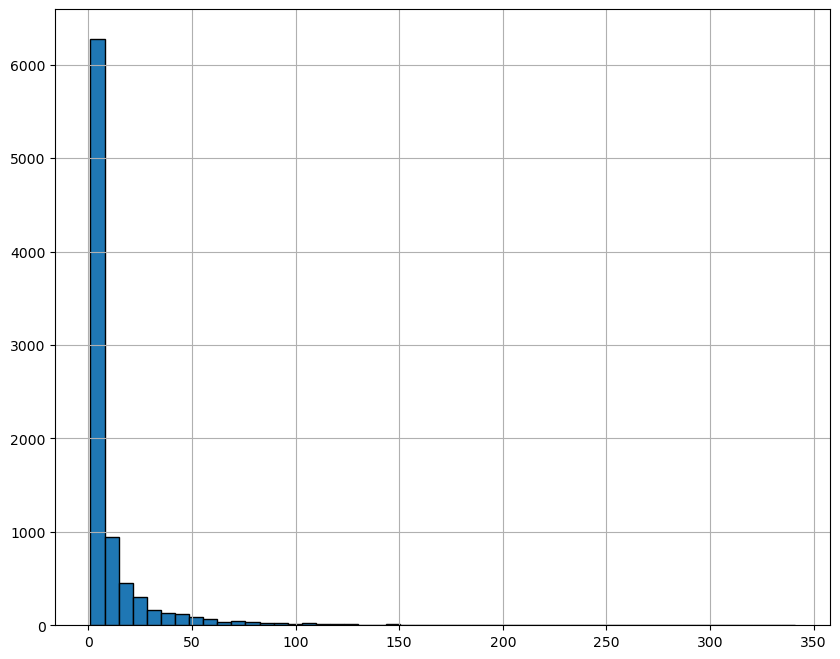

In [16]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

plot graph of 'ratings' column 

<AxesSubplot:>

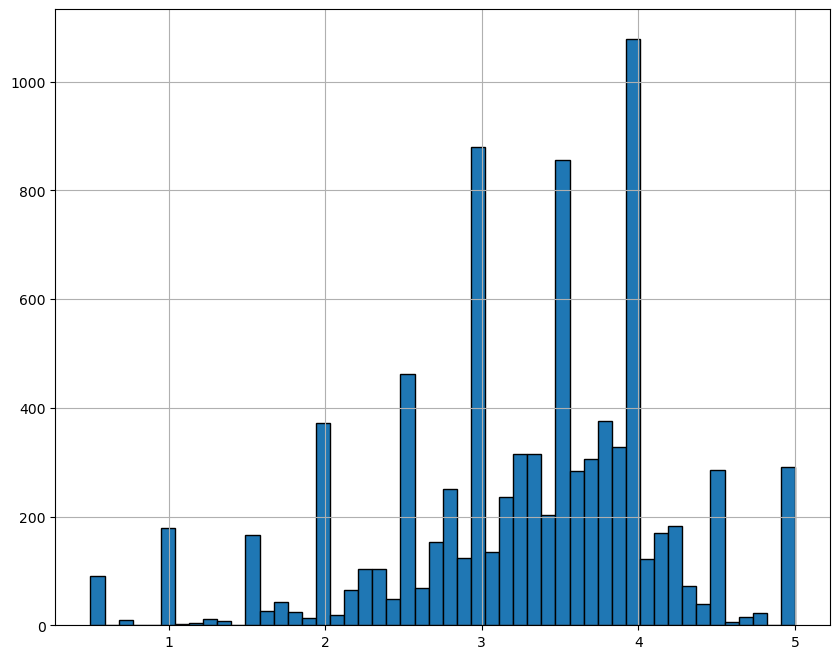

In [17]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 1000x800 with 0 Axes>

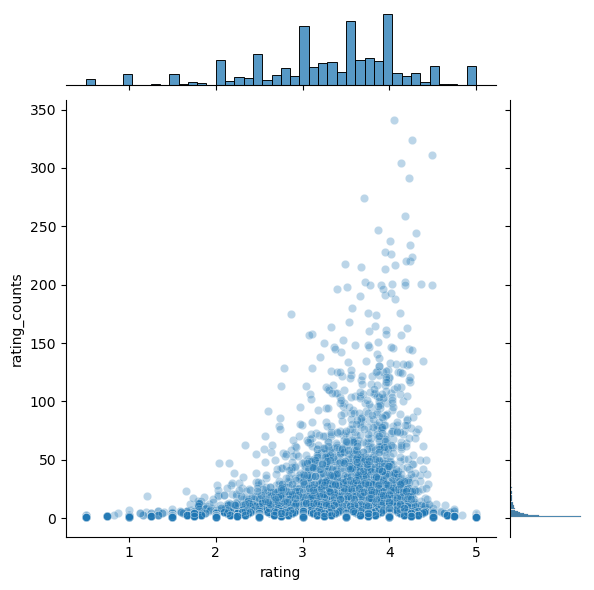

In [18]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.3)

Sorting values according to the 'rating column'

In [19]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analysing correlation with similar movies

In [20]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()

userId
1    NaN
2    3.0
3    5.0
4    5.0
5    4.0
Name: Forrest Gump (1994), dtype: float64

Similar movies like Forrest Gump

In [21]:
movies_similar_to_forrest_gump = user_movie_rating.corrwith(forrest_gump_ratings) 

corr_forrest_gump = pd.DataFrame(movies_similar_to_forrest_gump , columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

d:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


In [22]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head()

,Correlation
title,
$9.99 (2008),1.0
"Matador, The (2005)",1.0
Song of the Little Road (Pather Panchali) (1955),1.0
Song of the Sea (2014),1.0
Song of the Thin Man (1947),1.0


In [23]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.044946,19
(500) Days of Summer (2009),0.624458,45
*batteries not included (1987),0.603023,7
...And Justice for All (1979),0.173422,13


In [24]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65


CONCLUSION:

In conclusion, the collaborative filtering-based movie recommendation system developed in Python, inspired by the timeless classic 'Forrest Gump' has successfully demonstrated the effectiveness of leveraging user-item interactions to provide personalized and accurate movie suggestions. By employing machine learning techniques, the system learned from user preferences and effectively predicted movie ratings, offering a tailored cinematic experience. The inclusion of 'Forrest Gump' in the dataset allowed the model to recommend similar movies that resonate with the heartwarming and iconic elements of this classic, showcasing the versatility and adaptability of collaborative filtering. This project not only provided valuable insights into collaborative filtering methodologies but also presented a practical implementation of machine learning for personalized content recommendations, enhancing the overall user experience in the realm of entertainment.